# Logisitic Regression Implementation
---

In this module, we will utilize the [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) module from sci-kit learn. This will allow us to rapidly develop a model and use the built in model metrics to develop and compare our model quickly and easily.

This project will follow the 4 phase process of a typical machine learning project.

Phase 1: Data Cleaning/Analysis

Phase 2: Train the model

Phase 3: Test the model

Phase 4: Compare the results

---
# Phase 1 - Data Cleaning/Analysis


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from textwrap import wrap

# Import data from CSV
data_df = pd.read_csv('diabetes_data_upload.csv')

# Convert data frame to numpy array
data = data_df.to_numpy()

data_df[:10]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


Above is a snippet of our un-modified data as a pandas dataframe. This data is not in a useful format and needs to be changed to be used in a machine learning model. We will start by encoding each feature with a 0 or 1 instead of a string to represent postive/negative, male/female, etc. We will also standardize the age value to provide a more consistent value range with the rest of the features. Finally, we need to append a column of ones to act as the bias of our model.

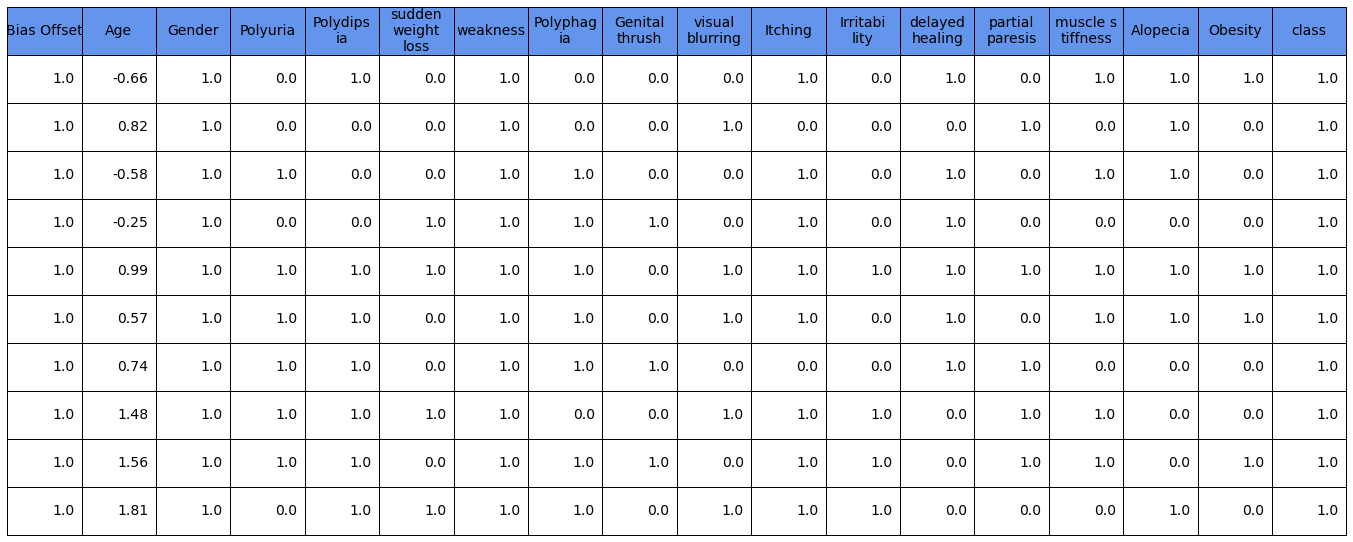

In [5]:
# reset data array incase cell is ran multiple times
data = data_df.to_numpy()

# Calculate average
age_mu = sum(data[:,0])/len(data[:,0])

# Calculate standard deviation
age_sigma = np.sqrt((1/len(data[:,0]))*sum((data[:,0] - age_mu)**2))

# Calculate standardized age
age_stand = (data[:,0] - age_mu)/age_sigma

# Replace the age with the standardized age
data[:,0] = age_stand

# Change text to a 1 or 0
for i in range(len(data[:,0])):
    for j, value in enumerate(data[i,:]):
        # Change true, yes, positive, and male to a 1
        if (value == 'True') or (value == 'Yes') or (value == 'Positive') or (value == 'Male'):
            data[i,j] = 1
        # Change no, negative, female to a 0
        elif (value == 'No') or (value == 'Negative') or (value == 'Female'):
            data[i,j] = 0

# Add a column of ones for the bias
data = np.c_[np.ones(data.shape[0]), data]

# Round the data to fit the table
data = np.round(np.array(data, np.float32), 2)


# Display data in a table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# Add column names
label = ['\n'.join(wrap(l, 8)) for l in data_df.columns]

# Name the bias column of 1s
label = ["Bias Offset"] + label

table = plt.table(cellText = data[:10,:], 
                  colLabels = label, 
                  colColours=["cornflowerblue"]*len(data[0,:]), 
                  loc = 'center')

table.scale(4,4)
table.auto_set_font_size(False)
table.set_fontsize(14)

Above is the results of our cleaning. The data is now useful, the bias is now a part of our features, and the age feature is normalized. 

---
Next, we need to shuffle and split the data, train and test our model, then view the metrics. Using sci-kit learn, this process becomes incredible simple. The [scikit-learn website](https://scikit-learn.org/stable/) provides a model, a data shuffle and split method, and convenient methods to display the confusion matrix and f score. 

# Phase 2: Train the model
In this phase, we need to prepare the data for the training instance and train the model. We will use scikit-learn's train_test_split module to shuffle and split the data. This module is very simple to use and is very useful. Next, we will create a logistic regression model using sci-kit learn's LogisticRegression module and fit the data to the model.

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], train_size=0.75, random_state=42)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

LogisticRegression()

---
# Phase 3: Test the Model
The model is now ready for use. To see how well we can trust the data, however, we can test it against data reserved from our training set. In this phase, we will predict a result using the reserved feature vectors and view the metrics.

Model F1 Score: 0.95
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        46
         1.0       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



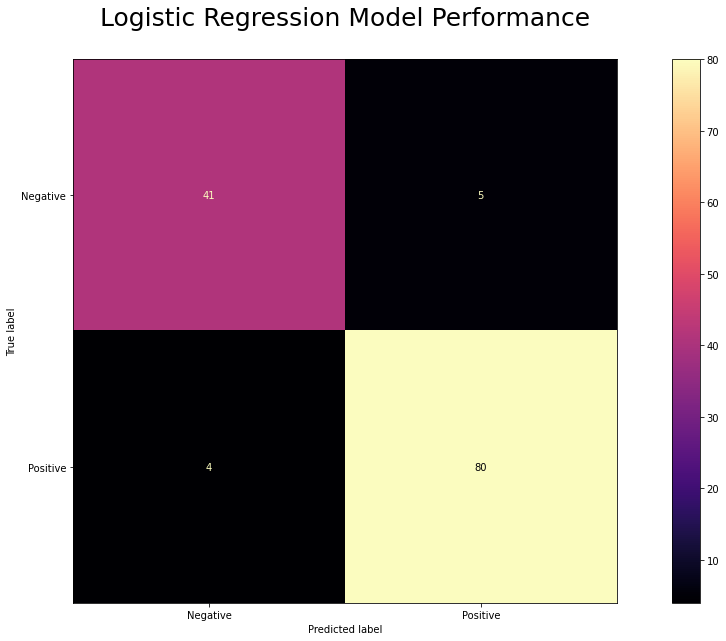

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_hat = model.predict(X_test)

print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.set_title('Logistic Regression Model Performance\n', fontsize = 25)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels = displabels, cmap = 'magma', colorbar=True, ax=ax)

print(classification_report(y_test, y_hat))

## Phase 4: Model Comparison
The scores for classification models are below:
Perceptron: .94
MLP: 1 (Tanh, ReLU)
Logistic Regression: .95
Decision Tree: 
KNN: 
SVM: 